In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('..')  # navigate to the root


In [3]:
# plotting
import pandas as pd
import rpy2

# the base of rpy2 plotting is matplotlib, thus we need to declare
# it inline in order to see the plots in the notebook
%matplotlib inline

# we need to activate the automatic conversion for pandas
from rpy2.robjects import pandas2ri
pandas2ri.activate()

# load the needed extension for the %%R cell magic
%load_ext rpy2.ipython

In [7]:
from normal_transformers.util.util_common import pickle_load_from_file

In [216]:
exp_folder = "experiments"
savedir_base = f"{exp_folder}/assets/multilingual"
datadir = f"{exp_folder}/data"

# loop over
langs = ["en", "ar", "az", "bg", "cs", "da"]
# langs = "ar az bg cs da de el en es et fi fr hi hu kk lt lv nl no pl ru sv sw tr ur uz vi zh".split()

sent_rep_types = ["mean", "cls"]
sim_names = ["cka", "svcca", "pwcca"]

model_names_or_dirs = [
    # "xlm-roberta-large",
    # "xlm-roberta-base",
    "bert-base-multilingual-cased",
    "bert-base-multilingual-uncased"
    # "distilbert-base-multilingual-cased",
    # "xlm-mlm-100-1280"
]

model_names_mapping = {
    "xlm-roberta-large": "XLM-R_large",
    "xlm-roberta-base": "XLMR-R_base",
    "bert-base-multilingual-cased": "mBERT_cased",
    "bert-base-multilingual-uncased": "mBERT_uncased",
    "distilbert-base-multilingual-cased": "distil_mBERT",
    "xlm-mlm-100-1280": "XLM-MLM_100"
}

In [20]:
import rpy2.robjects as robjects
from rpy2.robjects.lib import grdevices
from rpy2.robjects.vectors import IntVector, FloatVector
from IPython.display import Image, display

graphics = robjects.packages.importr('graphics')
import rpy2.robjects.packages as packages
import rpy2.robjects.lib.ggplot2 as ggplot2
import rpy2.robjects as ro


In [225]:
def ggplot2_plot_lines(sim_scores_dict, title, sim_name):
    tmp = {str(k).replace("-", "_"): v for k, v in sim_scores_dict.items()}
    sim_scores = tmp
    del tmp
    
    sim_scores_df = pd.DataFrame.from_dict(sim_scores)
    sim_scores_df["Layer"] = [i for i in range(len(sim_scores_df))]

    lang_pair_names = [v for v in sim_scores_df.columns.values if v != "Layer"]
    sim_scores_df = pd.melt(sim_scores_df, id_vars=["Layer"], value_vars=lang_pair_names,
                           var_name='lang_pair', value_name=sim_name)
    
    with grdevices.render_to_bytesio(grdevices.png, width=1024, height=512, res=150) as img:
        gp = ggplot2.ggplot(sim_scores_df, ggplot2.aes_string(x="Layer", y=sim_name))

        pp = gp \
        + ggplot2.ggtitle(title) \
        + ggplot2.geom_line(ggplot2.aes_string(color = "lang_pair")) \
        + ggplot2.scale_fill_manual(values=["#7268D8", "#E0B12B", "#EF6650", "#4DB6AC", "#3185FF"]) \
        + ggplot2.ylim(0, 1)
        
        
        pp.plot()
                                    
    display(Image(data=img.getvalue(), format='png', embed=True))

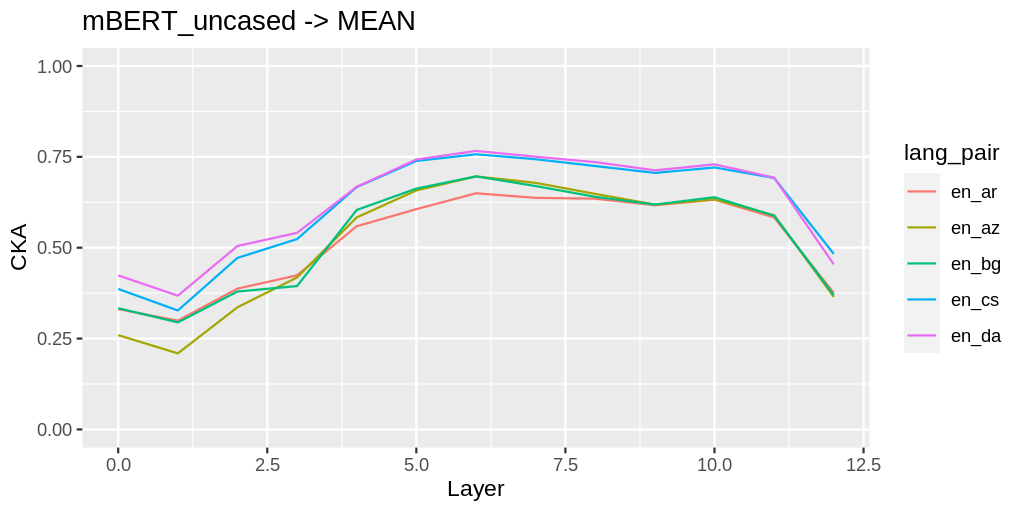

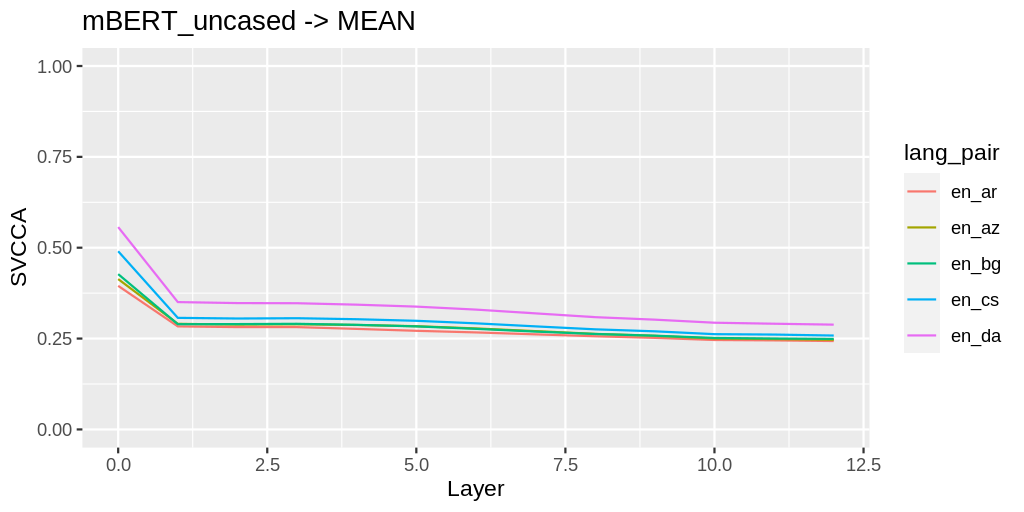

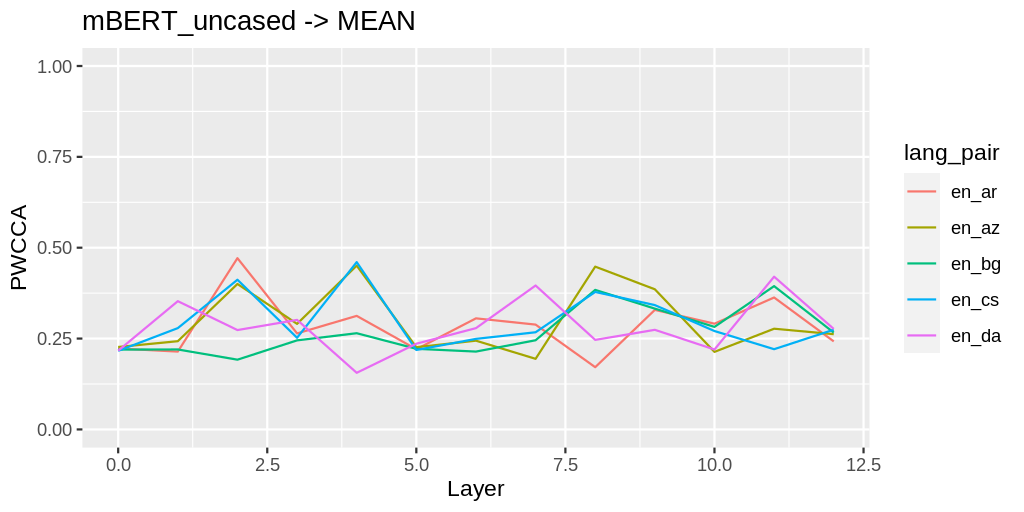

In [227]:
for sent_rep_type in ["mean"]:
    for model_name_or_dir in ["bert-base-multilingual-uncased"]:
        loaddir = f"{savedir_base}/{model_name_or_dir}/sim_scores"
        for sim_name in sim_names:
            loadfile_path = f"{loaddir}/xnli6_{sim_name}_{sent_rep_type}.pkl"
            sim_scores = pickle_load_from_file(loadfile_path, verbose=False)
            title = f"{model_names_mapping[model_name_or_dir]} -> {sent_rep_type.upper()}"
            ggplot2_plot_lines(sim_scores, title, sim_name.upper())            

In [11]:
import rpy2.robjects.packages as packages
import rpy2.robjects.lib.ggplot2 as ggplot2
import rpy2.robjects as ro
R = ro.r
datasets = packages.importr('datasets')
mtcars = packages.data(datasets).fetch('mtcars')['mtcars']


with grdevices.render_to_bytesio(grdevices.png, width=1024, height=896, res=150) as img:

    gp = ggplot2.ggplot(mtcars)
    pp = (gp 
          + ggplot2.aes_string(x='wt', y='mpg')
          + ggplot2.geom_point(ggplot2.aes_string(colour='qsec'))
          + ggplot2.scale_colour_gradient(low="yellow", high="red") 
          + ggplot2.geom_smooth(method='auto') 
          + ggplot2.labs(title="mtcars", x='wt', y='mpg'))

    pp.plot()
    
display(Image(data=img.getvalue(), format='png', embed=True))